In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
HousePr = pd.read_csv('C:\\Users\\Nikos Spanos\\Documents\\Jupyter_Lab_ReGen\\phase-b\\House Price.csv')

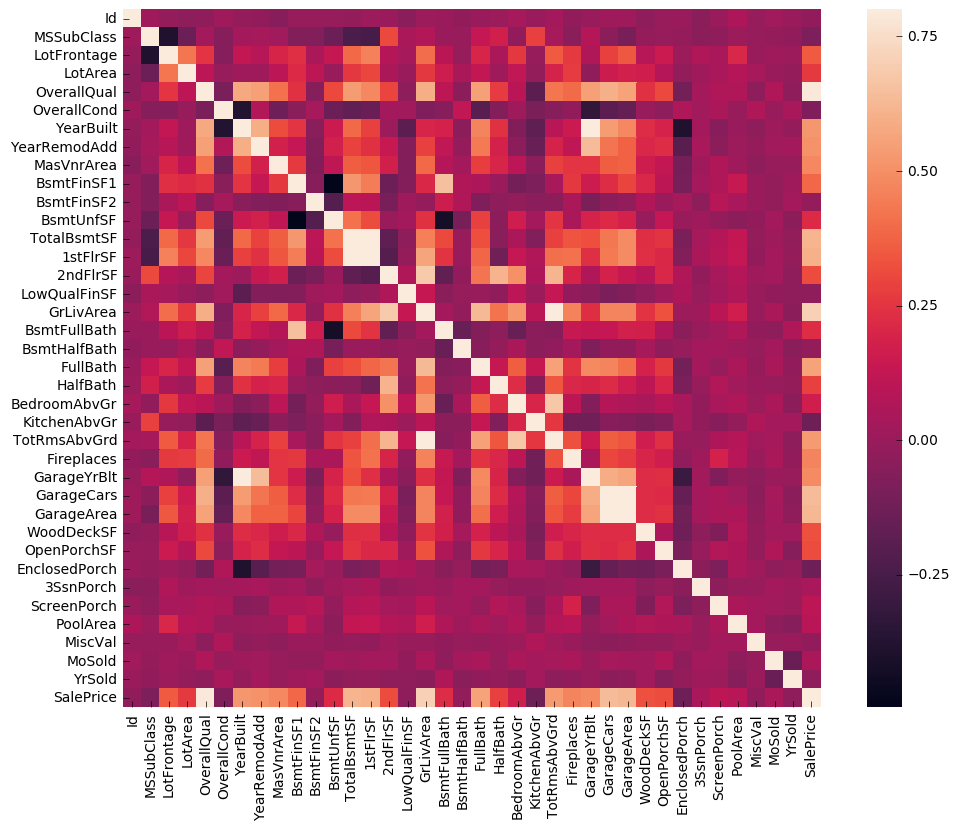

In [22]:
#correlation matrix
corrmat = HousePr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [3]:
HousePr_new = HousePr.drop(['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotFrontage', 'Alley', 'LandSlope', 'LotConfig', 
              'Utilities', 'LandContour', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'BldgType', 
              'MasVnrArea', 'ExterCond', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
              'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
              'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 
              'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageArea', 
              'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'Fence', 'MoSold', 'SaleType', 'SaleCondition'], axis=1)

In [4]:
HousePr_new =HousePr_new .drop(['MasVnrType', 'BsmtHalfBath', 'GarageFinish', 'MiscFeature', 'PoolQC'],axis=1)

In [5]:
HousePr_new.OpenPorchSF = HousePr_new.WoodDeckSF + HousePr_new.OpenPorchSF + HousePr_new.EnclosedPorch + HousePr_new["3SsnPorch"] + HousePr_new.ScreenPorch

In [6]:
HousePr_new=HousePr_new.drop(['WoodDeckSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch'], axis=1)

In [7]:
HousePr_new.OpenPorchSF=(HousePr_new.OpenPorchSF > 1).astype(int)

In [10]:
#HousePr_new

In [9]:
HousePr_new.fillna(0, inplace=True)

In [11]:
X = HousePr_new.drop(['SalePrice'], axis=1)
X = pd.get_dummies(X)
y = HousePr_new['SalePrice'].as_matrix().astype(np.float)
X = X.as_matrix().astype(np.float)

X.shape, y.shape

((1460, 89), (1460,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train.shape, y_train.shape

((1095, 89), (1095,))

In [16]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     78.64
Date:                Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                        16:21:37   Log-Likelihood:                -12803.
No. Observations:                1095   AIC:                         2.577e+04
Df Residuals:                    1013   BIC:                         2.618e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5924      0.117      5.057      0.0

In [14]:
from sklearn.metrics import mean_squared_log_error
y_test = y_test.astype('float64')

def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.298


In [25]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.33


C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.486209
Test set score: 0.426405


C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.298


C:\Users\Nikos Spanos\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [27]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=1)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

print(rmsle(y_test, pred).round(3))

0.332


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.decomposition import PCA

pipe = Pipeline(steps=[#('selector', VarianceThreshold()),
                       #('pca', PCA()),
                       ('random_forest',RandomForestRegressor())])

param_grid = {#'selector__threshold': [0.0, 0.005],
              #'pca__n_components': [15, 20],
              'random_forest__n_estimators':[25, 50, 80]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_estimator_
preds = grid.predict(X_test)
rmsle(y_test, preds).round(3)

0.164